# **UAS DATA MINING**

## **1. Data Understanding**

ILPD (Kumpulan Data Pasien Hati India)

*sumber: https://archive.ics.uci.edu/dataset/225/ilpd+indian+liver+patient+dataset*

Dataset ini berisi informasi medis dari 583 pasien yang terdiri dari 416 pasien dengan penyakit hati dan 167 pasien sehat. Label kelas ditandai dalam kolom Dataset, yang telah diubah menjadi biner: 1 untuk pasien dengan penyakit hati, dan 0 untuk pasien tanpa penyakit hati.

Setiap pasien memiliki 10 atribut sebagai fitur prediktor, yaitu:

- Usia,
- Jenis kelamin,
- Total Bilirubin,
- Bilirubin langsung,
- Total protein,
- Albumin,
- Rasio Albumin/Globulin (A/G Ratio),
- SGPT (ALT),
- SGOT (AST),
- Alkaline Phosphotase (ALP)

Dataset ini telah digunakan dalam berbagai penelitian terkait prediksi penyakit hati, termasuk analisis disparitas berdasarkan gender dan validitas penanda biokimia pada populasi India.

Dataset ini semula tidak memiliki header (nama kolom), sehingga telah diberi nama kolom secara manual. Kemudian dilakukan penanganan missing value dengan metode pengisian menggunakan nilai mean, serta encoding pada atribut kategorikal Gender menjadi bentuk numerik (Male=1, Female=0).

### **Library yang dibutuhkan**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay,roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

### **Informasi Data**

In [2]:
# Definisikan nama kolom sesuai struktur ILPD
columns = [
    "Age", "Gender", "Total_Bilirubin", "Direct_Bilirubin",
    "Alkaline_Phosphotase", "Alamine_Aminotransferase",
    "Aspartate_Aminotransferase", "Total_Proteins",
    "Albumin", "Albumin_and_Globulin_Ratio", "Dataset"
]

# Baca data dengan menambahkan header
df = pd.read_csv('ilpd.csv', header=None, names=columns)

# Tampilkan data
df


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [3]:
# Info tipe data dan missing values
print("\n📌 Info Dataset:")
print(df.info())


📌 Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Proteins              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB
None


In [4]:
# Cek jumlah nilai unik pada target
print("\n🎯 Distribusi Target (Dataset):")
print(df['Dataset'].value_counts())


🎯 Distribusi Target (Dataset):
Dataset
1    416
2    167
Name: count, dtype: int64


## **2. Pre Processing**

In [5]:
# Ubah target: 1 → 1 (liver), 2 → 0 (sehat)
df['Dataset'] = df['Dataset'].apply(lambda x: 1 if x == 1 else 0)

# Bersihkan spasi dan ubah ke huruf besar-kecil konsisten
df['Gender'] = df['Gender'].astype(str).str.strip().str.capitalize()

# Map setelah dibersihkan
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,0
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [6]:
# Cek nilai kosong
print("\n🧩 Missing Values:")
print(df.isnull().sum())


🧩 Missing Values:
Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Proteins                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64


In [7]:
# Cek nilai NaN per kolom
print("Missing sebelum diisi:\n", df.isnull().sum())

# Hitung rata-rata kolom yang memiliki NaN
mean_value = df['Albumin_and_Globulin_Ratio'].mean()

# Isi nilai NaN dengan rata-rata
df['Albumin_and_Globulin_Ratio'].fillna(mean_value, inplace=True)

# Verifikasi ulang
print("\nMissing setelah diisi:\n", df.isnull().sum())


Missing sebelum diisi:
 Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Proteins                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

Missing setelah diisi:
 Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Proteins                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64


/tmp/ipykernel_27932/1636412415.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Albumin_and_Globulin_Ratio'].fillna(mean_value, inplace=True)


### **Deteksi Outlier**
Sebelum modeling, dilakukan deteksi dan penghapusan outlier menggunakan metode IQR. Selanjutnya, dilakukan standarisasi data dengan StandardScaler dan split data menjadi 80% data latih dan 20% data uji.

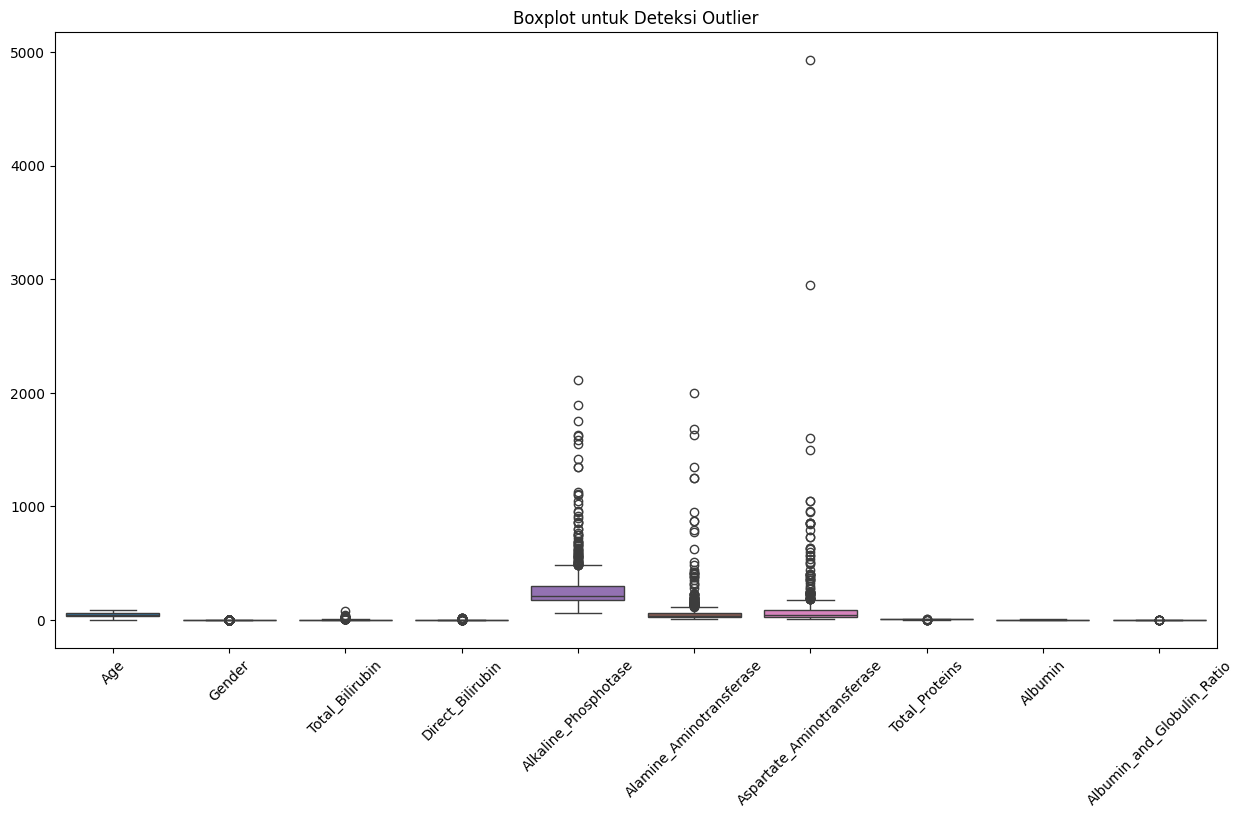

In [8]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df.drop("Dataset", axis=1))
plt.xticks(rotation=45)
plt.title("Boxplot untuk Deteksi Outlier")
plt.show()


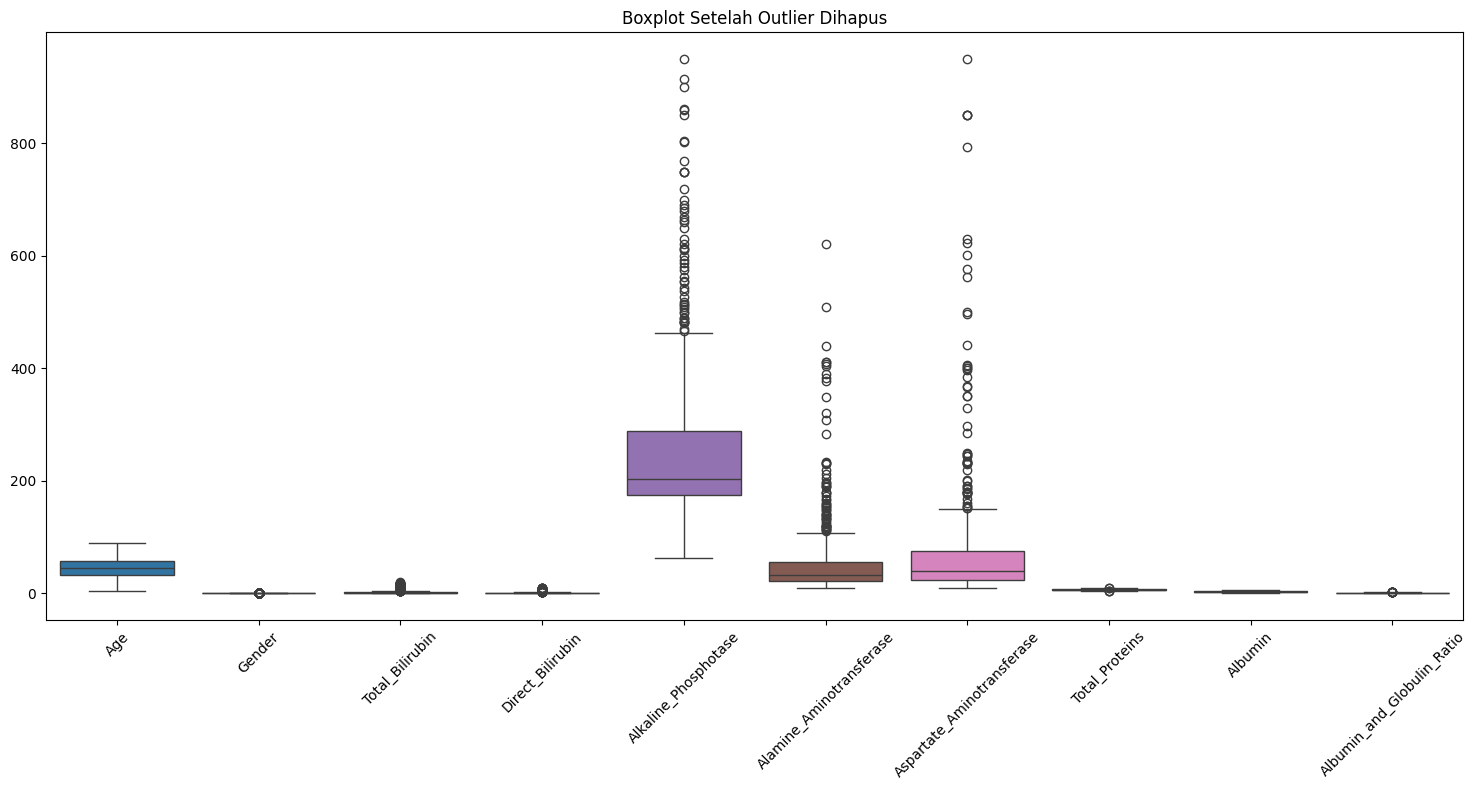

In [9]:
# Pisahkan fitur dan target
X = df.drop("Dataset", axis=1)
y = df["Dataset"]

# Hitung Z-score
z_scores = pd.DataFrame(zscore(X), columns=X.columns)

# Tandai baris dengan outlier (z > 3 di salah satu kolom)
outliers = (z_scores.abs() > 3).any(axis=1)

# Buang outlier
df_clean = df[~outliers].copy()

# Pisahkan fitur dan target dari data bersih
X_clean = df_clean.drop("Dataset", axis=1)

# Plot boxplot
plt.figure(figsize=(15, 8))
sns.boxplot(data=X_clean)
plt.xticks(rotation=45)
plt.title("Boxplot Setelah Outlier Dihapus")
plt.tight_layout()
plt.show()


### **Split Data**
Menjadi 80% data latih/train dan 20% data uji/test

In [10]:
# Target baru setelah buang outlier
X = df_clean.drop("Dataset", axis=1)
y = df_clean["Dataset"]

# Split data 80/20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Tampilkan bentuk data
print("Ukuran data latih:", X_train.shape)
print("Ukuran data uji  :", X_test.shape)

Ukuran data latih: (428, 10)
Ukuran data uji  : (108, 10)


### **Standarisasi/Normalisasi Data**

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Tampilkan data hasil normalisasi (contoh: data training saja)
df_scaled_train = pd.DataFrame(X_train_scaled, columns=X.columns)
df_scaled_train.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio
0,-0.665982,0.570156,-0.225244,3.448251,1.723326,2.002985,0.473259,0.939850,0.887515,0.140850
1,1.126724,0.570156,-0.318238,-0.350002,-0.406314,-0.265664,-0.208958,-0.204819,0.762026,1.806258
2,0.879454,0.570156,-0.380235,-0.292453,-0.660497,-0.279249,-0.296218,0.653683,0.511047,0.140850
3,-1.902330,-1.753907,-0.473229,-0.522650,-0.495621,-0.455850,-0.486604,2.275297,2.142409,0.807013
4,-1.098704,0.570156,-0.101251,-0.119805,-0.509361,-0.483019,-0.486604,1.607574,1.138494,0.140850


## **3. Modeling**

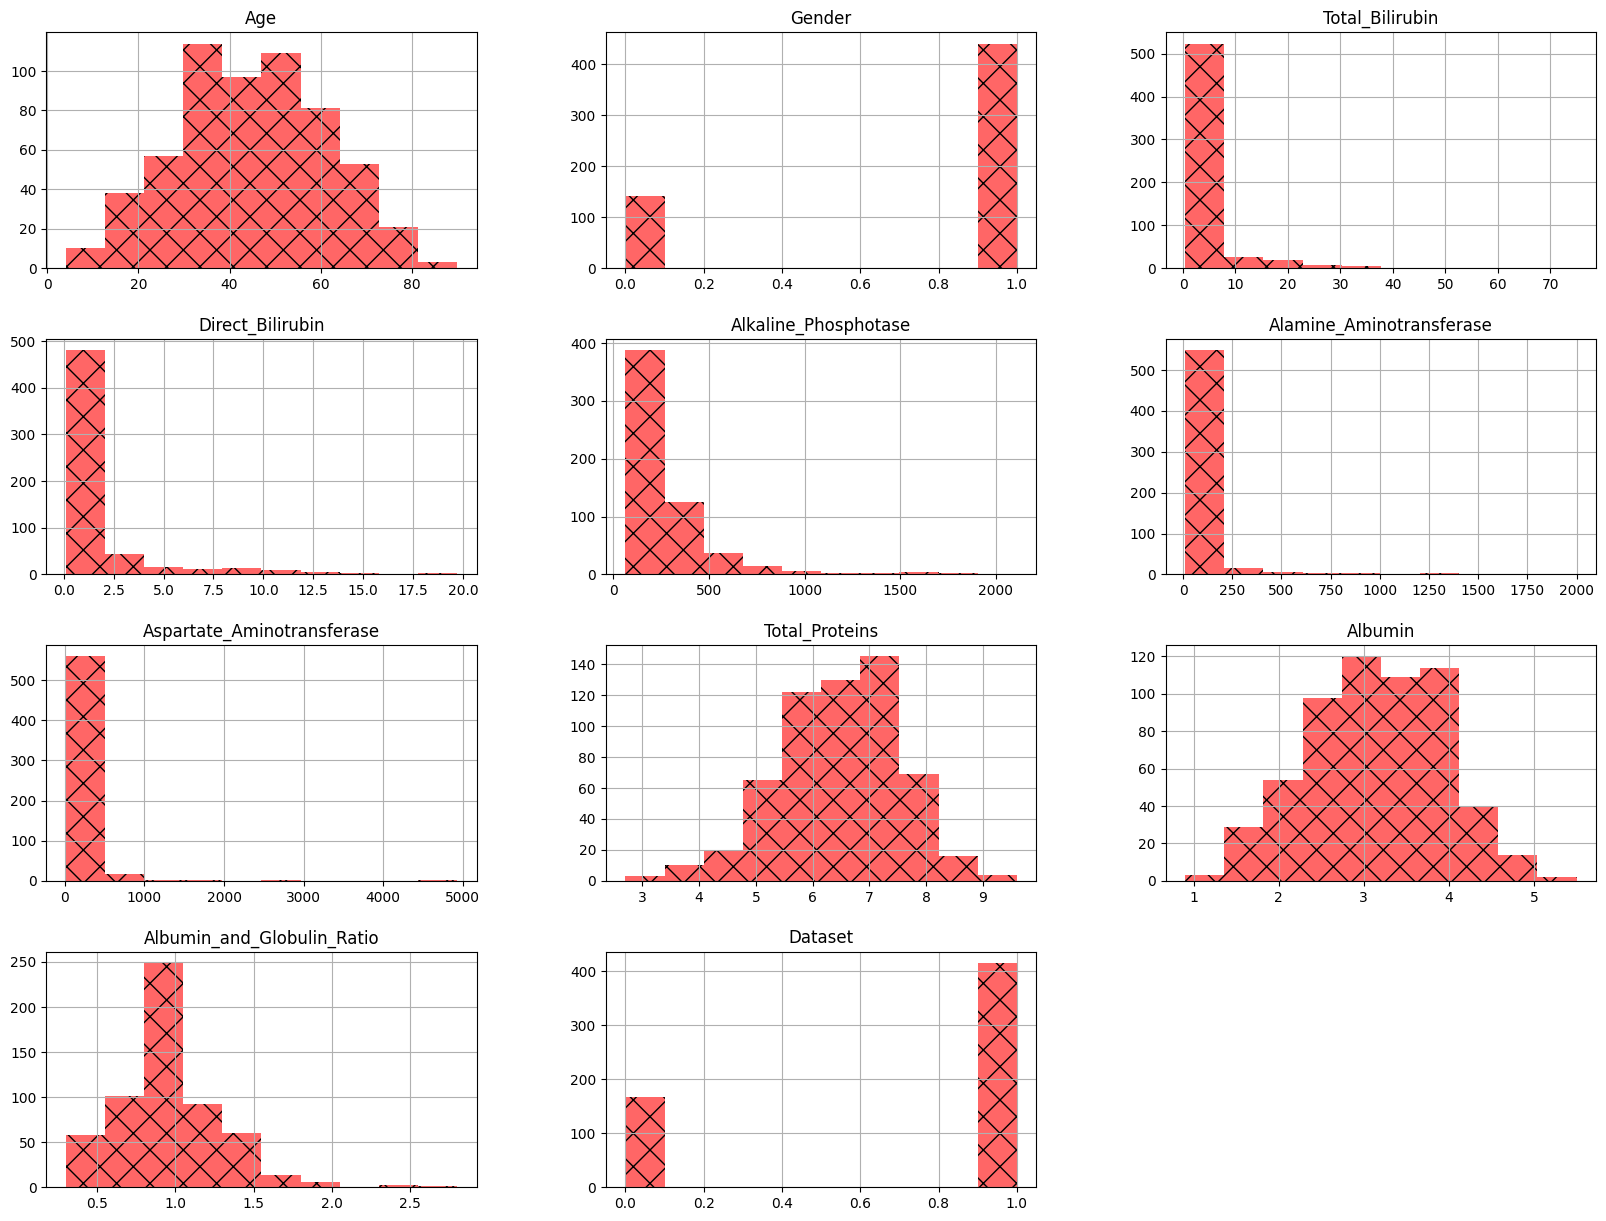

In [12]:
# Histogram untuk semua kolom numerik pada dataframe
w = 5
df.hist(bins=10, figsize=(20,15), color='red', alpha=0.6, hatch='X', rwidth=w);

### **K-NN**

Akurasi KNN: 0.6759259259259259

Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.48      0.48        33
           1       0.77      0.76      0.77        75

    accuracy                           0.68       108
   macro avg       0.62      0.62      0.62       108
weighted avg       0.68      0.68      0.68       108




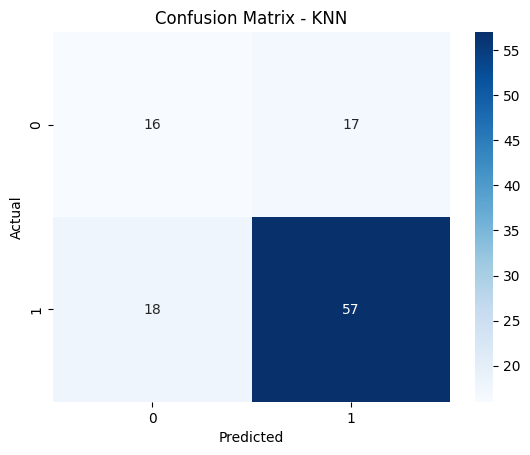

In [13]:
# Inisialisasi model KNN
knn = KNeighborsClassifier(n_neighbors=5)

# Latih model
knn.fit(X_train_scaled, y_train)

# Prediksi
y_pred_knn = knn.predict(X_test_scaled)
y_prob_knn = knn.predict_proba(X_test_scaled)[:, 1]  # Tambahan agar tidak warning

# Evaluasi
print("Akurasi KNN:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))
print()

# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### **Decision Tree**

Akurasi Decision Tree: 0.6018518518518519
Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.36      0.36        33
           1       0.72      0.71      0.71        75

    accuracy                           0.60       108
   macro avg       0.53      0.54      0.53       108
weighted avg       0.61      0.60      0.60       108




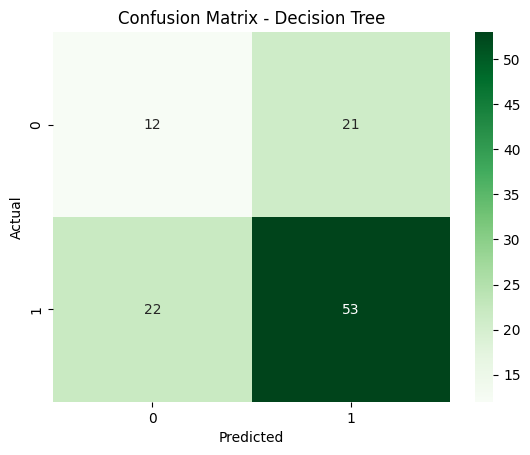

In [14]:
# Inisialisasi model
dt = DecisionTreeClassifier(random_state=42)

# Training
dt.fit(X_train_scaled, y_train)

# Prediksi
y_pred_dt = dt.predict(X_test_scaled)
y_prob_dt = dt.predict_proba(X_test_scaled)[:, 1]  # Tambahan untuk ROC/AUC

# Evaluasi
print("Akurasi Decision Tree:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print()

# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### **Naive Bayes**

Akurasi Naive Bayes: 0.5925925925925926
Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.91      0.58        33
           1       0.92      0.45      0.61        75

    accuracy                           0.59       108
   macro avg       0.67      0.68      0.59       108
weighted avg       0.77      0.59      0.60       108




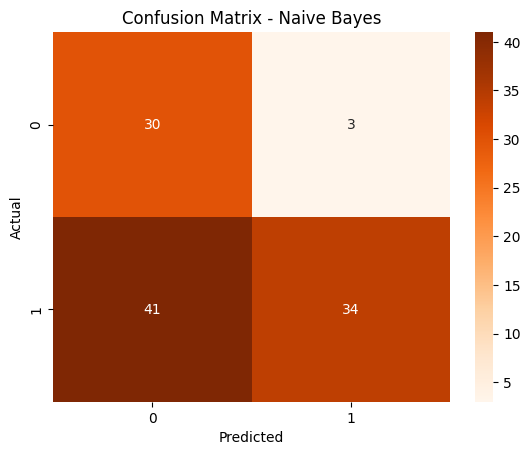

In [15]:
# Inisialisasi model
nb = GaussianNB()

# Training
nb.fit(X_train_scaled, y_train)

# Prediksi
y_pred_nb = nb.predict(X_test_scaled)
y_prob_nb = nb.predict_proba(X_test_scaled)[:, 1]  # Tambahan untuk ROC/AUC

# Evaluasi
print("Akurasi Naive Bayes:", accuracy_score(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))
print()

# Confusion Matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## **4. Evaluasi**

In [16]:
# Buat fungsi evaluasi
def evaluate_model(y_test, y_pred, y_prob, model_name):
    print(f"=== {model_name} ===")
    print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall:    {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score:  {f1_score(y_test, y_pred):.4f}")
    print("-" * 30)

# Evaluasi KNN
evaluate_model(y_test, y_pred_knn, y_prob_knn, "K-Nearest Neighbors")

# Evaluasi Decision Tree
evaluate_model(y_test, y_pred_dt, y_prob_dt, "Decision Tree")

# Evaluasi Naive Bayes
evaluate_model(y_test, y_pred_nb, y_prob_nb, "Naive Bayes")


=== K-Nearest Neighbors ===
Accuracy:  0.6759
Precision: 0.7703
Recall:    0.7600
F1 Score:  0.7651
------------------------------
=== Decision Tree ===
Accuracy:  0.6019
Precision: 0.7162
Recall:    0.7067
F1 Score:  0.7114
------------------------------
=== Naive Bayes ===
Accuracy:  0.5926
Precision: 0.9189
Recall:    0.4533
F1 Score:  0.6071
------------------------------


### **Model Data Latih**

In [17]:
# Semua import dulu
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import pickle

# Training model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)

nb = GaussianNB()
nb.fit(X_train_scaled, y_train)

# Simpan model
with open('model_knn.pkl', 'wb') as f:
    pickle.dump(knn, f)

with open('model_dt.pkl', 'wb') as f:
    pickle.dump(dt, f)

with open('model_nb.pkl', 'wb') as f:
    pickle.dump(nb, f)


web Deploy: https://prediction-gzhvj2bcb2sqnyrbqxndxp.streamlit.app/